In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcParams['figure.facecolor'] = 'white'

# Homework 3

**Instructions:** Complete the notebook below. Download the completed notebook in HTML format. Upload assignment using Canvas.

## Exercise: Income and Growth Across Countries

The data file `cross_country_gdp_per_capita.csv` contains annual data on GDP per capita for over 100 countries and is available here: https://raw.githubusercontent.com/letsgoexploring/economic-data/master/cross-country-production/csv/cross_country_gdp_per_capita.csv. The data are was constructed from the Penn World Table (https://www.rug.nl/ggdc/productivity/pwt/).

In this exercise, you will:

1. Analyze some basic facts about GDP per capita across the world.
2. Compute the average annual growth rate of GDP per capita for each country in the data.
3. Compute a linear regression of average GDP per capita growth on GDP per capita in the initial year.

Follow the instructions in the following cells.

### Part (a)

In [2]:
# Create a variable called 'data' that stores the data in the file 'cross_country_gdp_per_capita.csv' in a DataFrame
# Make sure that 'Year', the left-most column of the data, is set to be the index column
data = pd.read_csv('https://raw.githubusercontent.com/letsgoexploring/economic-data/master/cross-country-production/csv/cross_country_gdp_per_capita.csv',index_col=0,parse_dates = True)

# Print the first 5 rows of data
data.head()

,Algeria - DZA,Argentina - ARG,Australia - AUS,Austria - AUT,Bangladesh - BGD,Barbados - BRB,Belgium - BEL,Benin - BEN,Bolivia (Plurinational State of) - BOL,Botswana - BWA,...,Tunisia - TUN,Turkey - TUR,U.R. of Tanzania: Mainland - TZA,Uganda - UGA,United Kingdom - GBR,United States - USA,Uruguay - URY,Venezuela (Bolivarian Republic of) - VEN,Zambia - ZMB,Zimbabwe - ZWE
year,,,,,,,,,,,,,,,,,,,,,
1960-01-01,10509.008358,3163.732710,15646.139353,10123.029724,1614.258962,8077.843086,10413.567949,1613.682642,1793.725019,501.963539,...,1672.383999,5105.784826,1124.951944,860.620171,12569.280813,19180.187484,7424.589274,6881.015186,1757.650342,2414.726327
1961-01-01,8734.654889,3225.229409,15666.440016,10675.157983,1594.635939,8591.699053,10966.940259,1620.385825,1806.270764,542.991691,...,1715.566809,5062.252401,1133.652078,860.173890,12817.946324,19342.103029,7495.573036,6781.865640,1785.884491,2480.505976
1962-01-01,4595.165489,3247.774783,16218.777695,11039.562197,1679.000245,9219.070754,11832.121657,1551.691450,1812.806730,596.211469,...,1733.662454,5257.709264,1212.530695,858.673399,12946.663809,20213.129847,7569.820959,6824.167909,1770.477253,2387.665504
1963-01-01,5320.490300,3084.691110,17097.551206,11412.303692,1736.151714,9026.570727,12284.827489,1601.555862,1906.996349,616.322979,...,1874.419709,5619.228307,1270.920176,848.627413,13379.151279,20788.538117,7316.025332,7192.137422,1824.180363,2363.511866
1964-01-01,5413.859929,3176.120812,17574.573982,11866.055096,1682.423109,8914.135597,13017.674457,1651.505927,1970.671432,646.745990,...,1886.067528,5655.940421,1429.397151,889.057113,14067.603724,21691.511003,7491.037965,7710.422273,2015.107433,2226.032210


In [3]:
# Each column contains data for a specific country. Print the number of countries (e.g., the length of data.columns)
print("Number of countries: ",len(data.columns))

Number of countries:  104


In [4]:
# Each column contains data for a specific year. Print the number of years (e.g., the length of data.index)
print("Number of years of observations: ",len(data.index))

Number of years of observations:  60


In [5]:
# Print the values of the initial year and the final year in the data
print("Initial year: ",data.index[0].year)
print("Final year:   ",data.index[-1].year)

Initial year:  1960
Final year:    2019


In [6]:
# Create a variable called 'data_initial' that is equal to the first row of the data DataFrame
data_initial = data.iloc[0]

# Create a variable called 'data_final' that is equal to the last row of the data DataFrame
data_final = data.iloc[-1]

In [7]:
# Use the sort_values() method of data_initial to sort the Series in ascending order.
data_initial=data_initial.sort_values()

# Print the name and GDP per capita of the countries with the 10 lowest GDPs per capita in the initial year of the data
print('Countries with lowest GDP per capita in '+str(data.index[0].year)+':\n')
print(data_initial.head(10))

Countries with lowest GDP per capita in 1960:

Malta - MLT          332.605250
Ethiopia - ETH       500.025217
Botswana - BWA       501.963539
Mozambique - MOZ     560.160467
Egypt - EGY          667.223190
El Salvador - SLV    675.555918
Burundi - BDI        690.483404
Mali - MLI           717.298249
Nepal - NPL          750.282764
Uganda - UGA         860.620171
Name: 1960-01-01 00:00:00, dtype: float64


In [8]:
# Use the sort_values() method of data_final to sort the Series in ascending order.
data_final=data_final.sort_values()

# Print the name and GDP per capita of the countries with the 10 lowest GDPs per capita in the final year of the data
print('Countries with lowest GDP per capita in '+str(data.index[-1].year)+':\n')
print(data_final.head(10))

Countries with lowest GDP per capita in 2019:

Venezuela (Bolivarian Republic of) - VEN     251.176696
Burundi - BDI                                794.957690
Central African Republic - CAF               980.695287
D.R. of the Congo - COD                     1019.858187
Malawi - MWI                                1166.743042
Niger - NER                                 1211.209949
Mozambique - MOZ                            1231.471703
Madagascar - MDG                            1543.241302
Haiti - HTI                                 1569.443734
Uganda - UGA                                2097.404068
Name: 2019-01-01 00:00:00, dtype: float64


In [9]:
# Print the names of the countries that are among the 10 with lowest GDPs per capita in BOTH the initial year and 
# the final year. If you can't think of an efficient way to do it, just print maunally. E.g.:
#     print('Country 1')
#     print('Country 2')
#     Etc.
print('Countries among lowest 10 GDPs per capita in '+str(data.index[0].year)+' and '+str(data.index[-1].year)+':\n')
for country in data_initial.head(10).index:
    if country in data_final.head(10).index:
        print(country.split("-")[0])

Countries among lowest 10 GDPs per capita in 1960 and 2019:

Mozambique 
Burundi 
Uganda 


In [10]:
# Print the name and GDP per capita of the countries with the 10 highest GDPs per capita in the initial year of the data
print('Countries with highest GDP per capita in both '+str(data.index[0].year)+':\n')
print(data_initial.tail(10))

Countries with highest GDP per capita in both 1960:

Iceland - ISL           12402.693199
United Kingdom - GBR    12569.280813
Sweden - SWE            13001.330760
Denmark - DNK           13162.048275
New Zealand - NZL       14052.787169
Canada - CAN            14982.252586
Australia - AUS         15646.139353
Luxembourg - LUX        16148.062133
United States - USA     19180.187484
Switzerland - CHE       24761.019339
Name: 1960-01-01 00:00:00, dtype: float64


In [11]:
# Print the name and GDP per capita of the countries with the 10 highest GDPs per capita in the final year of the data
print('Countries with highest GDP per capita in '+str(data.index[-1].year)+':\n')
print(data_final.tail(10))

Countries with highest GDP per capita in 2019:

Australia - AUS                53768.702289
Denmark - DNK                  54055.919167
China, Hong Kong SAR - HKG     54879.957099
Netherlands - NLD              55576.780284
United States - USA            62498.409698
Norway - NOR                   72225.840685
Switzerland - CHE              75036.009994
Singapore - SGP                82211.559003
Luxembourg - LUX               91273.419648
Ireland - IRL                 101665.951527
Name: 2019-01-01 00:00:00, dtype: float64


In [12]:
# Print the names of the countries that are among the 10 with highest GDPs per capita in BOTH the initial year
# and the final year
print('Countries among highest 10 GDPs per capita in both '+str(data.index[0].year)+' and '+str(data.index[-1].year)+':\n')
for country in data_initial.tail(10).index:
    if country in data_final.tail(10).index:
        print(country.split("-")[0])

Countries among highest 10 GDPs per capita in both 1960 and 2019:

Denmark 
Australia 
Luxembourg 
United States 
Switzerland 


### Part (b)

Let $y_t$ denotes GDP per capita for some country in some year $t$ and let $g$ denotes the average annual growth in GDP per capita between years 0 and $T$. $g$ is defined by:
\begin{align}
y_T & = (1+g)^T y_0
\end{align}
which implies:
\begin{align}
g & = \left(\frac{y_T}{y_0}\right)^{1/T} - 1
\end{align}
We can use this equation to compute the aveage growth rate of GDP per capita for each country in our data. Note that for our data, $T$ is equal to `len(data.index)-1`.

In [13]:
# Create a variable called 'growth_rates' that contains the average growth rate of each country in the data.
# NOTE: You do not need to re-sort the variables data_initial and data_final. If their indices don't align,
# Pandas will automatically sort their indices alphabetically.
T = len(data.index)-1
growth_rates = (data_final/data_initial)**(1/T)-1

# Use the sort_values() method of growth_rates to sort the Series in ascending order.
growth_rates=growth_rates.sort_values()

In [14]:
# Print the average of the average growth rate of GDP per capita for all countries rounded to 4 decimal places
print('Average growth rate of GDP per capita for all countries: ',round(growth_rates.mean(),4))

Average growth rate of GDP per capita for all countries:  0.0231


In [15]:
# Print the standard deviation of the growth rate of GDP per capita for all countries rounded to 4 decimal places
print('Standard deviation of the growth rate of GDP per capita for all countries: ',round(growth_rates.std(),4))

Standard deviation of the growth rate of GDP per capita for all countries:  0.0175


In [16]:
# Print the name and growth rates of the countries with the 10 lowest growth rates of GDP per capita
print('Countries with lowest growth rates of GDP per capita:\n')
print(growth_rates.head(10))

Countries with lowest growth rates of GDP per capita:

Venezuela (Bolivarian Republic of) - VEN   -0.054563
D.R. of the Congo - COD                    -0.017165
Niger - NER                                -0.007383
Central African Republic - CAF             -0.006159
Gambia - GMB                               -0.001763
Haiti - HTI                                 0.000439
Nicaragua - NIC                             0.000889
Madagascar - MDG                            0.001119
Algeria - DZA                               0.001826
Ghana - GHA                                 0.002144
dtype: float64


In [17]:
# Print the name and growth rates of the countries with the 10 highest growth rates of GDP per capita
print('Countries with highest growth rates of GDP per capita:\n')
print(growth_rates.tail(10))

Countries with highest growth rates of GDP per capita:

China - CHN                0.045472
Thailand - THA             0.046554
Ireland - IRL              0.046744
Egypt - EGY                0.050308
Taiwan - TWN               0.051162
Romania - ROU              0.051579
Republic of Korea - KOR    0.060488
Botswana - BWA             0.061024
Singapore - SGP            0.069868
Malta - MLT                0.084268
dtype: float64


In [18]:
# Print the names of the countries that were BOTH among the 10 with lowest GDPs per capita in the initial year and 
# among the 10 with the highest growth of GDP per capita.
# If you can't think of an efficient way to do it, just print maunally. E.g.:
#     print('Country 1')
#     print('Country 2')
#     Etc.
print('Countries among highest 10 GDPs per capita in both '+str(data.index[0])+' and '+str(data.index[-1])+':\n')
for country in growth_rates.tail(10).index:
    if country in data_initial.head(10).index:
        print(country.split("-")[0])

Countries among highest 10 GDPs per capita in both 1960-01-01 00:00:00 and 2019-01-01 00:00:00:

Egypt 
Botswana 
Malta 


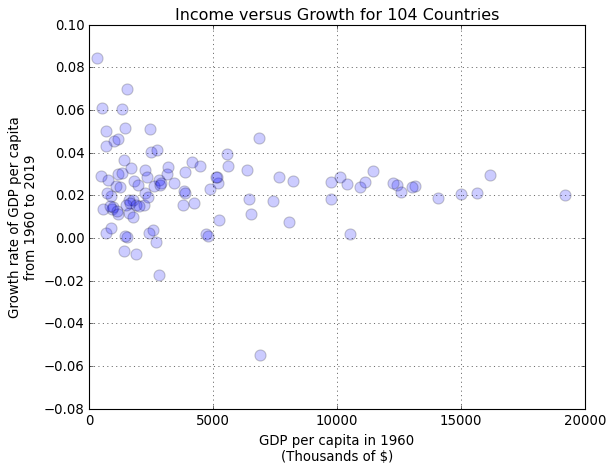

In [19]:
# Use the sort_index() method of data_initial to alphabetize the index [e.g., data_initial = data_initial.sort_index()]
data_initial = data_initial.sort_index()

# Use the sort_index() method of growth_rates to alphabetize the index
growth_rates = growth_rates.sort_index()

# Construct a scatter plot with:
#     1. GDP per capita in the initial year on the horizontal axis
#     2. Average growth rate of GDP per capita on the vertical axis
#     3. Size of scatter plot markers at least 50
#     4. Opacity of scatter plot markers no greater than 0.5
#     5. x-axis limit: [0,20000]
#     6. Suitable title and labels for the axes

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(data_initial,growth_rates,s=100,alpha=0.2)
ax.set_title('Income versus Growth for '+str(len(data.columns))+' Countries')
ax.set_xlabel('GDP per capita in '+str(data.index[0].year)+'\n(Thousands of $)')
ax.set_ylabel('Growth rate of GDP per capita\nfrom '+str(data.index[0].year)+' to '+str(data.index[-1].year))
ax.set_xlim([0,20000])
ax.grid()

**Question**

1. Describe in words the relationship between GDP per capita in the initial year and average growth of GDP per capita. How is the relationship different for low income countries and high income countries?

**Answer**

1. There is a right-pointing triangle-shaped relationship between GDP per capita in the initial year and average growth of GDP per capita. Countries with high GDP per capita in the initial year had average growth rates that were almost uniformly close to the world average of about 2 percent. Countries with lower GDP per capita in the initial year had much more variation across the average growth rates of their GDP per capita. The countries with the highest growth rates of GDP per capita were among the lowest income initially and the countries with the lowest growth rates of GDP per capita were also among the lowest income initially.<!-- answer -->

### Part (c)

In this part you will use OLS to estimate the relationship between GDP per capita in the initial year and average growth of GDP per capita.

\begin{align}
g_i & = \beta_0 + \beta_{\text{1}}y_i + \epsilon_i,
\end{align}

where $g_i$ is the average annual growth rate of country $i$, $y_i$ is country $i$'s initial GDP per capita, and $\epsilon_i$ is the residual of the regression.

In [20]:
growth_rates = growth_rates.sort_index()
data_initial = data_initial.sort_index()


# Create a variable called 'y' that is equal to the average growth rates of the countries
y = growth_rates

# Create a variable called x' that is equal to the GDP per capita of the countries in the initial year
x = data_initial

# Use the Statsmodels function add_constant() to add a constant column to the variable x
x = sm.add_constant(data_initial)

# Create a variable called 'model' equal to the output of the Statsmodels OLS function regressing y upon x
model = sm.OLS(y,x)

# Create a variable called 'results' that stores the fitted model (i.e., the output of the fit() method of model)
results = model.fit()

# Print the summary of results generated by the summary() method of results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.6262
Date:                Thu, 19 Oct 2023   Prob (F-statistic):              0.431
Time:                        13:09:55   Log-Likelihood:                 273.81
No. Observations:                 104   AIC:                            -543.6
Df Residuals:                     102   BIC:                            -538.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0244    

**Questions**

1. Interpret the estimate for the coefficient on $y_i$.
2. Interpret the estimate for the constant. Where did we see this number earlier?
3. Interpret the R-squared of the regression.

**Answers**

1. The estimated coefficient on $y_i$ is both very close to zero and is not statistically different from zero.<!-- answer -->
2. The estimated constant is equal to the average growth rate of GDP per capita across all countries and we computed that in the second code cell of Part (b).<!-- answer -->
3. The R-squared implies that the linear regression model explains essentially zero percent of the variation in average GDP per capita growth across countries.<!-- answer -->

## Exercise: Income and Growth Across US States

The data file `state_income_data.csv` contains annual data on income per capita for the 48 continental states, Washington D.C., and the United States as a whole and is available here: https://raw.githubusercontent.com/letsgoexploring/economic-data/master/us-convergence/csv/state_income_data.csv. 

In this exercise, you will:

1. Analyze some basic facts about income per capita among US states.
2. Compute the average annual growth rate of income per capita for each state in the data.
3. Compute a linear regression of average income per capita growth on income per capita in the initial year.

Follow the instructions in the following cells.

### Part (a)

In [21]:
# Create a variable called 'state_df' that stores the data in the file 'cross_country_gdp_pc.csv' in a DataFrame
# Make sure that 'Year', the left-most column of the data, is set to be the index column
state_df= pd.read_csv('https://raw.githubusercontent.com/letsgoexploring/economic-data/master/us-convergence/csv/state_income_data.csv',index_col=0,parse_dates=True)

# Print the first 5 rows of state_df
print(state_df.head())

                     AL           AR           AZ            CA           CO  \
1840-01-01   962.306222  1234.657040          NaN           NaN          NaN   
1880-01-01  1129.751540  1250.796347  4781.269909   3913.782119  4458.483755   
1900-01-01  1350.860055  1372.648121  4357.613081   3943.639839  3812.911446   
1929-01-01  3387.131026  3217.243576  6349.543427  10554.257804  6699.936292   
1930-01-01  2898.710460  2468.863661  5709.247217   9798.302656  6326.463132   

                      CT            DC            DE           FL  \
1840-01-01   1652.261627           NaN   1234.657040  1252.813761   
1880-01-01   2945.423657           NaN   2178.806541   968.358463   
1900-01-01   3398.938203           NaN   2723.508176  1459.800382   
1929-01-01  10925.886600  14058.186451  10947.122531  5510.724145   
1930-01-01  10217.127742  14482.530585   9456.629560  5158.161578   

                     GA  ...           TN           TX           UT  \
1840-01-01  1034.933107  ...   85

The DataFrame method `dropna()` returns a DataFrame that omits rows that contain missing (NaN means *not a number*) values. The following command will remove the rows with missing values from the DataFrame `df`:

    df =  df.dropna()
    
The DataFrame method `drop()` returns a DataFrame that omits rows or columns with a given label. The following command will remove the column named `'LABEL'` from the DataFrame `df`:   
   
    df = df.drop('LABEL',axis=1)
    
The argument `axis=1` means to look among the columns for `'LABEL'`. If we had wanted to remove a row with the index value `'LABEL'`, then the axis argument would have been: `axis=0`.

In [22]:
# Remove the rows with missing data from state_df
state_df = state_df.dropna()

# Remove the column named 'United States' from state_df
state_df = state_df.drop('United States',axis=1)

# Set state_df equal to itself divided by 1000 so that its units are in thousands of dollars
state_df = state_df/1000

# Print the first 5 rows of state_df
print(state_df.head())

                  AL        AR        AZ         CA        CO         CT  \
1929-01-01  3.387131  3.217244  6.349543  10.554258  6.699936  10.925887   
1930-01-01  2.898710  2.468864  5.709247   9.798303  6.326463  10.217128   
1931-01-01  2.702371  2.542685  5.281906   9.249478  5.797814   9.912787   
1932-01-01  2.212020  2.114636  4.479688   8.124652  4.966611   8.722871   
1933-01-01  2.346545  2.189154  4.421233   7.869509  5.050794   8.456145   

                   DC         DE        FL        GA  ...        SD        TN  \
1929-01-01  14.058186  10.947123  5.510724  3.641962  ...  4.406456  3.960501   
1930-01-01  14.482531   9.456630  5.158162  3.339579  ...  3.934751  3.537970   
1931-01-01  15.391230   9.531999  4.876551  3.120010  ...  2.972608  3.353396   
1932-01-01  15.400668   8.222037  4.410128  2.740679  ...  2.629382  2.698943   
1933-01-01  13.521248   8.098440  4.135069  2.890256  ...  1.945915  2.875948   

                  TX        UT        VA        VT      

In [23]:
# Create a variable called 'state_growth_rates' that contains the average growth rate of each state in the data.
T = len(state_df)-1
state_growth_rates = (state_df.iloc[-1]/state_df.iloc[0])**(1/T)-1

state_growth_rates

AL    0.026848
AR    0.027664
AZ    0.021167
CA    0.019005
CO    0.023536
CT    0.019657
DC    0.018315
DE    0.016078
FL    0.023994
GA    0.027379
IA    0.022101
ID    0.022735
IL    0.018212
IN    0.021282
KS    0.023234
KY    0.025004
LA    0.024942
MA    0.020990
MD    0.020755
ME    0.021660
MI    0.018115
MN    0.023247
MO    0.020766
MS    0.027406
MT    0.021480
NC    0.027962
ND    0.027960
NE    0.022648
NH    0.022657
NJ    0.020033
NM    0.024402
NV    0.017866
NY    0.017458
OH    0.018599
OK    0.023990
OR    0.021108
PA    0.019842
RI    0.018486
SC    0.029386
SD    0.026836
TN    0.026673
TX    0.024710
UT    0.022368
VA    0.026713
VT    0.021794
WA    0.022008
WI    0.020766
WV    0.022515
WY    0.022416
dtype: float64

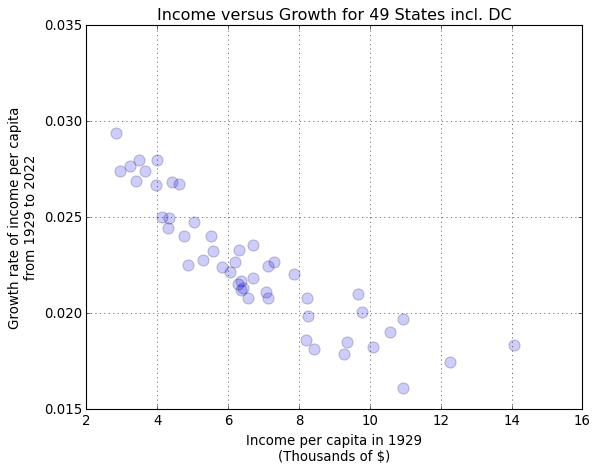

In [24]:
# Construct a scatter plot with:
#     1. Income per capita in the initial year on the horizontal axis
#     2. Average growth rate of income per capita on the vertical axis
#     3. Size of scatter plot markers at least 50
#     4. Opacity of scatter plot markers no greater than 0.5
#     5. y-axis limit: [0.015,0.035]
#     6. Suitable title and labels for the axes

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(state_df.iloc[0],state_growth_rates,s=100,alpha=0.2)
ax.set_title('Income versus Growth for '+str(len(state_df.columns))+' States incl. DC')
ax.set_xlabel('Income per capita in '+str(state_df.index[0].year)+'\n(Thousands of $)')
ax.set_ylabel('Growth rate of income per capita\nfrom '+str(state_df.index[0].year)+' to '+str(state_df.index[-1].year))
ax.set_ylim([0.015,0.035])
ax.grid()

### Part (b)

Like you did for the country data above, use OLS to estimate the relationship between income per capita in the initial year and average growth of income per capita.

\begin{align}
g_i & = \beta_0 + \beta_{\text{1}}y_i + \epsilon_i,
\end{align}

where $g_i$ is the average annual growth rate of country $i$, $y_i$ is state $i$'s initial income per capita, and $\epsilon_i$ is the residual of the regression.

In [25]:
# Create a variable called 'y' that is equal to the average growth rates of the states
y = state_growth_rates

# Create a variable called x' that is equal to the income per capita of the states in the initial year
x = state_df.iloc[0]

# Use the Statsmodels function add_constant() to add a constant column to the variable x
x = sm.add_constant(x)

# Create a variable called 'model' equal to the output of the Statsmodels OLS function regressing y upon x
model = sm.OLS(y,x)

# Create a variable called 'results' that stores the fitted model (i.e., the output of the fit() method of model)
results = model.fit()

# Print the summary of results generated by the summary() method of results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     186.8
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           5.46e-18
Time:                        13:09:55   Log-Likelihood:                 250.91
No. Observations:                  49   AIC:                            -497.8
Df Residuals:                      47   BIC:                            -494.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0300    

**Questions**

1. Interpret the estimate for the coefficient on $y_i$.
2. Interpret the R-squared of the regression.
3. Why do you think that initial income and average growth are so strongly correlated in the state data but not so in the country data? (If you're not sure, referesh your knowledge about the difference between *conditional* and *unconditional* convergence: https://en.wikipedia.org/wiki/Convergence_(economics)#Types_of_Convergence)

**Answers**

1. The estimated coefficient on $y_i$ implies that a \$1,000 increase in income per captia reduces a states average growth rate of income per capita by 1.1 percent. I.e., states with lower initial income had greater income growth than higher income states. <!-- answer -->
2. The R-squared implies that the linear regression model explains about 80 percent of the variation in average income per capita growth across states.<!-- answer -->
3. Lower-income US states are "economically similar" to higher-income states in that they have the same currency, federal regulation, legal traditions, and language, and they have similar laws, poltical institutions. Therefore, it's not surprising to observe *catch-up growth* among the lower-income states. By contrast, lower-income countries are a diverse group with broad differences in policies and institutions and so it is not at all guaranteed that low income countries will enjoy catch-up growth simply by virtue of their low income. <!-- answer -->